In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import seaborn as sns

In [2]:
from keras.datasets import cifar10

from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

# Making model

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_val, y_val = x_train[-5000:], y_train[-5000:]
x_train, y_train = x_train[:-5000], y_train[:-5000]

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
scaler = StandardScaler()
x_train_cnn = scaler.fit_transform(x_train.reshape(45000,-1)).reshape(45000,32,32,3)
x_test_cnn = scaler.transform(x_test.reshape(10000,-1)).reshape(10000,32,32,3)
x_val_cnn = scaler.transform(x_val.reshape(5000,-1)).reshape(5000,32,32,3)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_val_cat = to_categorical(y_val)

In [17]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
pre_trained_model = tf.keras.applications.EfficientNetB0(include_top=False,
                              weights='imagenet',input_shape = (32,32,3))

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
last_layer = pre_trained_model.get_layer('top_activation')
last_output = last_layer.output

x = Flatten()(last_output)
x = Dense(units = 64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
out_x = Dense(10, activation = 'softmax')(x)


In [ ]:
model = Model(pre_trained_model.input , out_x)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(x_train_cnn, y_train_cat,
          batch_size = 32,
          epochs = 10,
          verbose = 1,
          validation_data = (x_test_cnn, y_test_cat))

Epoch 1/10
1407/1407 [==============================] - 66s 41ms/step - loss: 0.3254 - accuracy: 0.3324 - val_loss: 0.2731 - val_accuracy: 0.3945
Epoch 2/10
1407/1407 [==============================] - 58s 41ms/step - loss: 0.2154 - accuracy: 0.5412 - val_loss: 0.2234 - val_accuracy: 0.5152
Epoch 3/10
1407/1407 [==============================] - 56s 40ms/step - loss: 0.1810 - accuracy: 0.6257 - val_loss: 0.3022 - val_accuracy: 0.3540
Epoch 4/10
1407/1407 [==============================] - 57s 41ms/step - loss: 0.1581 - accuracy: 0.6789 - val_loss: 0.1501 - val_accuracy: 0.6796
Epoch 5/10
1407/1407 [==============================] - 54s 39ms/step - loss: 0.1404 - accuracy: 0.7184 - val_loss: 0.1317 - val_accuracy: 0.7264
Epoch 6/10
1407/1407 [==============================] - 54s 38ms/step - loss: 0.1269 - accuracy: 0.7463 - val_loss: 0.1256 - val_accuracy: 0.7392
Epoch 7/10
1407/1407 [==============================] - 55s 39ms/step - loss: 0.1154 - accuracy: 0.7684 - val_loss: 0.1289 -

# Evaluate Model


In [ ]:
import matplotlib.pyplot as plt

#### first picture

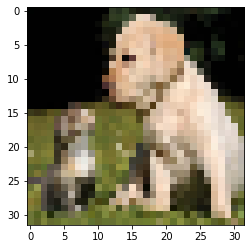

In [ ]:
img = cv2.imread('mixed.png')
img = cv2.resize(img,(32,32))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [ ]:
aa = scaler.transform(img.reshape(-1,32*32*3)).reshape(32,32,3)


In [ ]:
pred = model.predict(aa)
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_labels[np.argmax(pred)]

1/1 [==============================] - 0s 26ms/step


'dog'

In [ ]:
np.argsort(pred)
print(class_labels[np.argsort(pred)[0][-1]])
print(class_labels[np.argsort(pred)[0][-2]])
print(class_labels[np.argsort(pred)[0][-3]])

dog
frog
cat


#### second picture

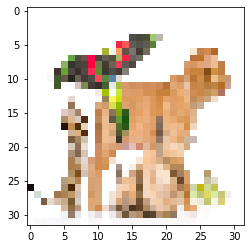

In [ ]:
img = cv2.imread('mixed2.png')
img = cv2.resize(img,(32,32))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [ ]:
aa = scaler.transform(img.reshape(-1,32*32*3)).reshape(32,32,3)


In [ ]:
pred = model.predict(aa)
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_labels[np.argmax(pred)]

1/1 [==============================] - 0s 22ms/step


'frog'

In [ ]:
np.argsort(pred)
print(class_labels[np.argsort(pred)[0][-1]])
print(class_labels[np.argsort(pred)[0][-2]])
print(class_labels[np.argsort(pred)[0][-3]])

frog
bird
cat


# soliving a specific network problem


In [ ]:
pre_trained_model = tf.keras.applications.EfficientNetB0(include_top=False,
                              weights='imagenet',input_shape = (32,32,3))

In [12]:
for i in range(10):
  pre_trained_model.layers[i].trainable = True

In [ ]:
last_layer = pre_trained_model.get_layer('top_activation')
last_output = last_layer.output

x = Flatten()(last_output)
x = Dense(units = 64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
out_x = Dense(10, activation = 'softmax')(x)


In [ ]:
model = Model(pre_trained_model.input , out_x)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(x_train_cnn, y_train_cat, #new trainging data with
          batch_size = 32,                    # a new spicific label
          epochs = 10,
          verbose = 1,
          validation_data = (x_test_cnn, y_test_cat))

# new training dataset

In [13]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /content/horse-or-human.zip
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /content/validation-horse-or-human.zip 

--2023-01-01 11:08:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/horse-or-human.zip’

/content/horse-or-h 100%[===================>] 142.65M  19.7MB/s    in 8.1s    

2023-01-01 11:08:32 (17.6 MB/s) - ‘/content/horse-or-human.zip’ saved [149574867/149574867]

--2023-01-01 11:08:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [14]:
import os
import zipfile

local_zip = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/training')

local_zip = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation')

In [15]:
train_dir = '/content/training'
validation_dir = '/content/validation'

In [53]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1/255.
)

In [54]:
train_generator =  train_datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    class_mode = 'binary',
    target_size = (160,160)
)

test_generator =  test_datagen.flow_from_directory(
    validation_dir,
    batch_size = 32,
    class_mode = 'binary',
    target_size = (160,160)
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


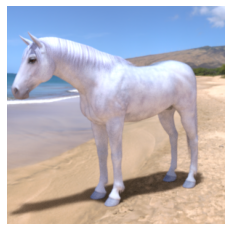

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/content/training/horses/horse01-1.png')[:,:,::-1]
img = np.expand_dims(img, axis = 0)
plt.imshow(img[0])
plt.axis('off')
plt.show()

In [56]:
pre_trained_model = tf.keras.applications.EfficientNetB0(include_top=False,
                              weights='imagenet',input_shape = (160,160,3))

last_layer = pre_trained_model.get_layer('top_activation')
last_output = last_layer.output

x = Flatten()(last_output)
x = Dense(units = 64, activation='relu')(x)
out_x = Dense(1, activation = 'softmax')(x)

In [57]:
model = Model(pre_trained_model.input , out_x)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    verbose=1,
    batch_size = 32,
    validation_data=test_generator
)

Epoch 1/10
33/33 [==============================] - 24s 455ms/step - loss: 0.3111 - accuracy: 0.5131 - val_loss: 5.0434 - val_accuracy: 0.5000
Epoch 2/10
33/33 [==============================] - 14s 415ms/step - loss: 0.0811 - accuracy: 0.5131 - val_loss: 2.4877 - val_accuracy: 0.5000
Epoch 3/10
33/33 [==============================] - 14s 414ms/step - loss: 0.0285 - accuracy: 0.5131 - val_loss: 2.1935 - val_accuracy: 0.5000
Epoch 4/10
33/33 [==============================] - 14s 417ms/step - loss: 0.0444 - accuracy: 0.5131 - val_loss: 0.7279 - val_accuracy: 0.5000
Epoch 5/10
33/33 [==============================] - 14s 414ms/step - loss: 0.0302 - accuracy: 0.5131 - val_loss: 1.1201 - val_accuracy: 0.5000
Epoch 6/10
33/33 [==============================] - 14s 414ms/step - loss: 0.0159 - accuracy: 0.5131 - val_loss: 1.6879 - val_accuracy: 0.5000
Epoch 7/10
33/33 [==============================] - 14s 412ms/step - loss: 0.0078 - accuracy: 0.5131 - val_loss: 3.2177 - val_accuracy: 0.5000